University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2023  
Luigi Acerbi  

# Problem Set 1: Bayesian inference in perception

- This homework problem set focuses on **Week 1 and 2** of the course.
- This problem set is worth **20 points** in total (out of 100 for the full course).
- Check the submission deadline on Moodle!


## Submission instructions

Submission must be perfomed entirely on Moodle (**not** by email).
1. When you have completed the exercises, save the notebook.
2. Report your solutions and answers on Moodle ("*Problem set 1 answer return*").
3. Submit two files on Moodle ("*Problem set 1 notebook return*"): 
  - The notebook as `.ipynb`.
  - The same notebook downloaded as `.pdf` (there are various ways to save the file as PDF, the most general is "File" > "Print Preview" and then print the page to PDF using your browser - remember to enter the Print Preview first).

## IMPORTANT

1. Do not share your code and answers with others. Contrary to the class exercises, which you can do with others, these problems are *not* group work and must be done individually.
2. It is allowed to use snippets of code from the lecture exercises and model solutions.
3. It is your responsibility to ensure that the notebook has fully finished running all the cells, all the plots view properly etc. before submitting it. However, the notebook should be runnable from scratch if needed ("Kernel > Restart & Run All").
4. Submit your work by the deadline.
5. Unless stated otherwise, please report your numerical answers in Moodle with full numerical precision (~14-15 digits), unless the answer is an integer.
6. If you are confused, think there is a mistake or find things too difficult, please ask on Moodle.

## References

- \[**MKG22**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2022.
- *Acknowledgements*: Question 1.1 and 1.2 of this notebook are adapted from problems in \[**MKG22**\].

In [1]:
# set-up -- do not change
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
np.random.seed(1)

# Question 1.1 (5 pts)

> This question is about performing Bayesian inference in an "everyday" scenario, with some simplifying assumptions. Related material was covered in Week 1 of the course.


You are one of 80 passengers waiting for your bag at an airport luggage carousel (see Section 2.5 of \[**MKG22**\]). We assume each passenger has one and only one bag. In general, your bag looks the same as 6% of all bags. In formulas:
$$
p(\text{looks like your bag}|\text{it is your bag}) = 1, \qquad p(\text{looks like your bag}|\text{it is not your bag}) = 0.06.
$$

Derive a general expression for the probability that the bag you are viewing (which matches your bag visually) is your own, $$p(\text{it is your bag} | \text{looks like your bag}),$$ 
as a function of the number of bags $b$ you have viewed so far (before the current one). 

- a) What is $p(\text{it is your bag} | \text{looks like your bag})$ after 40 bags have gone by, none of which was yours (that is, $b = 40$)?
- b) How many bags must you view (without finding your own) before the posterior probability $p(\text{it is your bag}|\text{looks like your bag})$ is equal or greater than 70%?

Report your results in Moodle.

First we define I as "it is my bag" and L as "it looks like my bag". Using Bayes' rule, we look for $P(I|L)$:

$$P(I|L) = \frac{P(L|I)P(I)}{P(L)}$$

In general, $P(I) = \frac{1}{80-b}$, and to calculate the evidence we can use the law of total probability:

$$P(L) = P(I)P(L|I) + P(\neg I)P(L|\neg I)$$

In [2]:
# code here...

# The general probability of it being my bag is 1 over the amount of bags left
def probIsBag(b):
    return 1 / (80 - b)

def calculateConditional(b):
    # The likelihood P(I|), it is my bag given it looks like it, 
    prior = probIsBag(b)
    evidence = prior * 1 + (1-prior) * 0.06
    return 1 * prior / evidence

# Part a
print(calculateConditional(40))

# Part b
i = 0
while calculateConditional(i) < 0.7:
    i += 1
print(f"We must go through {i} bags")

0.29940119760479045
We must go through 72 bags


# Question 1.2 (5 pts)

> This question deals with how perception about the world is influenced by the statistics of the environment. See Chapter 2 and particularly Section 2.6 of \[**MKG22**\].


Imagine you live in a very boring world consisting of a 2 x 10 grid of squares:

```
▢▢▢▢▢▢▢▢▢▢
▢▢▢▢▢▢▢▢▢▢
```
Only two things ever happen in this world: 
- $H1$ ("vertical bar"): With a probability of 30%, a vertical bar will appear in this world, consisting of two black squares in a column, chosen so that each possible column is equally probable. 
- $H2$ ("independent dots"): With a probability of 70%, one black square will appear in a random position in the top row (uniformly chosen), and another black square will appear in a random position in the bottom row (uniformly chosen, independently from the first row). 

When doing inference, we will refer to these possibilities as Hypotheses 1 and 2 ($H1$ and $H2$), respectively.

- a) Suppose that as an observer in this world, you see the following retinal image ($\text{obs}_a$):
```
▢▢▢▢▢▢■▢▢▢
▢▢▢▢▢■▢▢▢▢
```  
  Calculate the posterior probability of $H1$ and $H2$ and report your results in Moodle.
  
- b) Suppose in another scenario you have the following retinal image ($\text{obs}_b$):
```
▢▢▢▢▢▢■▢▢▢
▢▢▢▢▢▢■▢▢▢
```  
  Calculate the posterior probability of $H1$ and $H2$ and report your results in Moodle.

- c) Write out a brief explanation of your reasoning for parts (a) and (b), and report them in Moodle. Add a brief explanation for how your answer to (b) may explain why observers in this world may tend to perceive the second image as containing a *single object*, as opposed to two separate dots. (max 200 words)

### Answers

Write your extended answers here if needed, and report a summary in Moodle (max 200 words).

#### Part C
For part A, H1 is impossible to observe because we are not seeing a vertical line, and H1 produces only vertical bars.

For part B, it can be seen that the probability of observing a vertical bar under H2 is very low, since we need to observe two independent events of 1/10 each. This means that under H2 we would observe a vertical bar once every 100 times, whereas we would always observe a vertical bar under H1. This affects our prior when se see the realization in B, because we expect to see the bar way more often when under H1.

In [3]:
# code here...

# Part a
# We have a 0% probability of having a vertical bar since the dots aren't aligned

# Part b
# P(H1) = 0.3
# P(H2) = 0.7
# P(H1|obs) = P(obs|H1)*P(H1)/P(obs)
# P(H2|obs) = P(obs|H2)*P(H2)/P(obs) = 1 - P(H1|obs)
# P(obs) = P(H1)*P(obs|H1) + P(~H1)*P(obs|~H1)

p_h1 = 0.3
p_h2 = 0.7
p_obs_h1 = 1/10
p_obs_h2 = (1/10) * (1/10)
p_obs = p_h1 * p_obs_h1 + p_h2 * p_obs_h2
p_h1_obs = p_obs_h1 * p_h1 / p_obs
p_h2_obs = p_obs_h2 * p_h2 / p_obs

print(p_h1_obs)
print(p_h2_obs)
print(p_h1_obs + p_h2_obs)

0.8108108108108109
0.18918918918918923
1.0


# Question 1.3 (5 pts)

> In this question, we examine how an observer would estimate a continuous quantity under a noisy measurement.

An observer is estimating the horizontal location of a visual stimulus on a screen (for simplicity, we assume a 1D problem). 

We assume a Bayesian observer with prior $p(s_\text{hyp}) = \mathcal{N}\left(s| \mu_s = 2, \sigma_s^2 = 5^2 \right)$ and likelihood function $p(x_\text{obs}| s_\text{hyp}) = \mathcal{N}\left(x_\text{obs}| s_\text{hyp}, \sigma^2 = 2^2 \right)$ with observed noisy measurement $x_\text{obs} = -3$, in arbitrary units.

- a) What's the value of the posterior mean estimate $\hat{s}_\text{PM}$?
- b) What's the value of the maximum-likelihood estimate $\hat{s}_\text{ML}?$
- c) What's the probability density of the posterior at $s_\text{hyp} = 2.5$?

Report your results in Moodle.

## Part c)
First, let's write Bayes rule for the given prior and likelihood function:
$$p(s_\text{hyp} | x_\text{obs}) = \frac{\mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s) \mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2)}{\int \mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s) \mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2) d s_\text{hyp}}$$
Note that we can swap the argument and mean parameter for a Gaussian because the distribution is symmetric about the mean (the difference between the observation and the mean is squared, so the order in which we subtract them doesn't matter):
$$
\mathcal{N}(x_\text{obs}| s_\text{hyp}, \sigma^2) = \mathcal{N}(s_\text{hyp}| x_\text{obs}, \sigma^2)
$$
So, using the fundamental Gaussian identity we have:
$$\mathcal{N}(s_\text{hyp}| \mu_\text{s}, \sigma^2_s) \mathcal{N}(s_\text{hyp}| x_\text{obs}, \sigma^2) = 
\mathcal{N}\left(x_\text{obs} | \mu_\text{s}, \sigma^2 + \sigma^2_s \right) \mathcal{N}\left(s_\text{hyp} | \frac{x_\text{obs} \sigma_s^2 + \mu_s \sigma^2}{\sigma^2 + \sigma_s^2}, \frac{\sigma^2 \sigma_s^2}{\sigma^2 + \sigma_s^2} \right) $$
Plugging this into the posterior above, the normalization constant cancels out, the denominator integrates to 1, and we are left with:
$$ p(s_\text{hyp} | x_\text{obs}) = \mathcal{N}\left(s_\text{hyp} | \frac{x_\text{obs} \sigma_s^2 + \mu_s \sigma^2}{\sigma^2 + \sigma_s^2}, \frac{\sigma^2 \sigma_s^2}{\sigma^2 + \sigma_s^2} \right).$$

In [4]:
# code here...
x_obs = -3
var_s = 5*5
var = 2*2
mu_s = 2

# Part a
w = var_s / (var_s + var)
mu_post = w*x_obs + (1-w)*mu_s
print(f"Posterior mean: {mu_post}")

# Part b
# Using the definition of the likelihood function for a normal distribution, we see that the maximum likelihood is at s=x_obs
print(f"ML: {x_obs}")

# Part c
var_post = var*var_s / (var+var_s)
post_pdf = sps.norm.pdf(s_hyp := 2.5, mu_post, np.sqrt(var_post))
print(f"Posterior density: {post_pdf}")

Posterior mean: -2.310344827586207
ML: -3
Posterior density: 0.007498207939080527


# Question 1.4 (5 pts)

> In this question, we examine a more complex inference scenario under a noisy measurement and a complex prior.


A Bayesian observer is estimating the value of a stimulus (e.g., horizontal location of a sound source, in arbitrary units).
The observer is told that there are two potential sound sources (e.g., two speakers hidden behind a screen), one to the right and one to the left (0 is straight ahead), but the observer is not told the exact location of these sound sources, just a vague position.

Thus, we represent the observer's prior over the potential sound location as a mixture of $K = 2$ Gaussians:
$$p(s_\text{hyp}) = \sum_{k=1}^K w_k \mathcal{N}\left(s_\text{hyp}| \mu_k, \sigma_k^2\right)$$
where 
$$w_1 = w_2 = \frac{1}{2}, \qquad \mu_1 = -3, \mu_2 = 3, \qquad \sigma_1 = \sigma_2 = 1.$$
Each mixture component represents one of the two potential locations of the sound (each component is Gaussian, and not a single point, because the location of the source itself is not exactly known).

After the sound is played (heard as noisy measurement $x_\text{obs}$), the likelihood is Gaussian, $p(x_\text{obs}| s_\text{hyp}) = \mathcal{N}\left(x_\text{obs}| s_\text{hyp}, \sigma^2 \right)$, with $\sigma = 1$.

- a) Compute the posterior mean for $x_\text{obs} = 1$ via numerical integration.
- b) Compute $p(x_\text{obs})$ for $x_\text{obs} = 5$ via numerical integration.
- c) Given that the prior is a mixture of Gaussians and the likelihood is Gaussian, this is a case in which we could still perform all computations analytically. Write the analytical expression for $p(x_\text{obs})$. Double-check the validity of your expression by computing $p(x_\text{obs})$ for $x_\text{obs} = 5$ and that it is the same (up to a small numerical error) as what you got in part (b).

Report your numerical results in Moodle, and write the analytical expression for $p\left(x_\text{obs}\right)$ below.

### Answer:

Write your expression for $p(x_\text{obs})$ here.

Posterior mean with x_obs=1: 1.8577223804598917


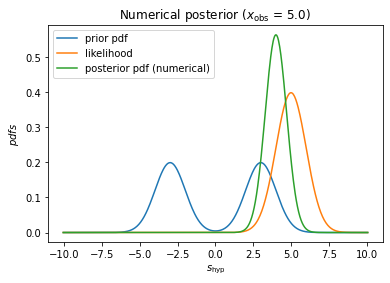

0.05188845305018106


In [5]:
# code here...

mu_1 = -3
mu_2 = 3
sigma_k = 1.
sigma = 1.
x_obs = 1.


def compute_grid_1d_gaussian(mu_1, mu_2, sigma_s, sigma, N):
    """Compute a suitable 1-D grid for stimulus values, for a Gaussian prior and likelihood."""
    # total variance is prior variance plus measurement variance, we use this to set the bounds for the grid
    sigma_tot = np.sqrt(sigma_s**2 + sigma**2)
    lb = mu_1 - 5*sigma_tot # lower bound
    ub = mu_2 + 5*sigma_tot # upper bound
    s_grid = np.linspace(lb, ub, N)
    ds = s_grid[1] - s_grid[0] # grid spacing
    return s_grid, ds

def compute_posterior_1d(s_grid, prior_pdf, likelihood):
    """Given a prior and likelihood evaluated on a 1-D grid of stimulus values, compute numerical posterior."""
    ds = s_grid[1] - s_grid[0] # grid spacing
    protoposterior = prior_pdf * likelihood
    normalization_constant = sp.integrate.romb(protoposterior, dx=ds)
    posterior_pdf = protoposterior / normalization_constant    
    return posterior_pdf, normalization_constant

def plot_distributions(s_grid, prior_pdf, likelihood, posterior_pdf, x_obs):
    """Plot distributions useful for this exercise."""
    plt.plot(s_grid, prior_pdf, label='prior pdf')
    plt.plot(s_grid, likelihood, label='likelihood')
    plt.plot(s_grid, posterior_pdf, label='posterior pdf (numerical)')
    plt.xlabel(r'$s_\mathrm{hyp}$')
    plt.ylabel(r'$pdfs$')
    plt.title(r'Numerical posterior ($x_\mathrm{obs}$ = ' + str(x_obs) + ')')
    plt.legend()
    plt.show()

N = int(2**9 + 1)
s_grid, ds = compute_grid_1d_gaussian(mu_1, mu_2, sigma_k, sigma, N) # compute a grid of stimulus values
prior_pdf = 0.5*sps.norm.pdf(s_grid, mu_1, sigma_k) + 0.5*sps.norm.pdf(s_grid, mu_2, sigma_k) # evaluate prior pdf on the grid
likelihood = sps.norm.pdf(s_grid, x_obs, sigma) # evaluate likelihood on the grid (for a fixed x_obs)
posterior_pdf, _ = compute_posterior_1d(s_grid, prior_pdf, likelihood) # compute posterior
# plot_distributions(s_grid, prior_pdf, likelihood, posterior_pdf, x_obs)

mean_post = sp.integrate.romb(posterior_pdf * s_grid, dx=ds)
print(f"Posterior mean with x_obs=1: {mean_post}")
####################################################

# Part b

N = int(2**9 + 1)
x_obs=5.
s_grid, ds = compute_grid_1d_gaussian(mu_1, mu_2, sigma_k, sigma, N) # compute a grid of stimulus values
prior_pdf = 0.5*sps.norm.pdf(s_grid, mu_1, sigma_k) + 0.5*sps.norm.pdf(s_grid, mu_2, sigma_k) # evaluate prior pdf on the grid
likelihood = sps.norm.pdf(s_grid, x_obs, sigma) # evaluate likelihood on the grid (for a fixed x_obs)
posterior_pdf, p_obs_x = compute_posterior_1d(s_grid, prior_pdf, likelihood) # compute posterior
plot_distributions(s_grid, prior_pdf, likelihood, posterior_pdf, x_obs)

print(p_obs_x)

## Part c

We have that $p(x_{obs})$ is given by:

$$p(x_{obs}) = \int p(x_{obs}|s_{hyp})p(s_{hyp}) ds_{hyp}$$

From the prompt, we have:

$$p(s_\text{hyp}) = 0,5 \cdot \mathcal{N}\left(s_\text{hyp}| -3, 1^2\right) + 0,5 \cdot \mathcal{N}\left(s_\text{hyp}| 3, 1^2\right)$$
$$p(x_\text{obs}| s_\text{hyp}) = \mathcal{N}\left(x_\text{obs}| s_\text{hyp}, 1^2 \right)$$
$$\Rightarrow p(x_{obs}|s_{hyp})p(s_{hyp}) = 0,5\left( \mathcal{N}\left(s_\text{hyp}| -3, 1^2\right) + \mathcal{N}\left(s_\text{hyp}| 3, 1^2\right) \right) \mathcal{N}\left(x_\text{obs}| s_\text{hyp}, 1^2 \right)$$

Note that $\mathcal{N}\left(x_\text{obs}| s_\text{hyp}, 1^2 \right) = \mathcal{N}\left(s_\text{hyp}| x_\text{obs}, 1^2 \right)$. The integral is:

$$\int p(x_{obs}|s_{hyp})p(s_{hyp}) ds_{hyp} = 0,5\int \mathcal{N}\left(s_\text{hyp}| -3, 1^2\right)\mathcal{N}\left(s_\text{hyp}| x_\text{obs}, 1^2 \right) + \mathcal{N}\left(s_\text{hyp}| 3, 1^2\right)\mathcal{N}\left(s_\text{hyp}| x_\text{obs}, 1^2 \right) ds_{hyp}$$

We can use the Gaussian identity on each term, so the integral equals:

$$0,5\int \mathcal{N}\left(x_\text{obs}| -3, 2\right)\mathcal{N}\left(s_\text{hyp}| \frac{x_\text{obs}-3}{2}, \frac{1}{2} \right) + \mathcal{N}\left(x_\text{obs}| 3, 2\right)\mathcal{N}\left(s_\text{hyp}| \frac{x_\text{obs}+3}{2}, \frac{1}{2} \right) ds_{hyp}$$
$$= 0,5\cdot\left( \mathcal{N}\left(x_\text{obs}| -3, \sqrt{2}^2\right) + \mathcal{N}\left(x_\text{obs}| 3, \sqrt{2}^2\right) \right)$$

Here, similarly to the previous problem's section c, integrating $\mathcal{N}\left(s_{\text{hyp}}\frac{x_\text{obs}+\mu_k}{2}, \frac{1}{2} \right)$ over $s_{\text{hyp}}$ gives 1, and the other terms don't depend on $s_{\text{hyp}}$.

In [6]:
x_obs = 5.
0.5*( sps.norm.pdf(x_obs, -3, np.sqrt(2)) + sps.norm.pdf(x_obs, 3, np.sqrt(2)) )

0.05188845305036769